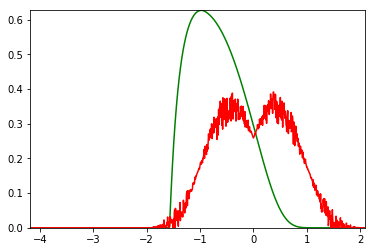

In [7]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

#critical value of alpha when the beckman starts to have double peak
alpha = .5

beckman = brdf.Brdf(alpha, alpha);
zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o))
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -theta_o - math.pi  
maxAngle = minAngle + math.pi *2.0

rangeAngle = maxAngle - minAngle
maxBounce = 1
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    #mu = i/sampleCount
    wi = vec3.Vec3(0, math.sin(thetaWi), mu)
    beval = beckman.Eval(wo, wi, False)
    zeval = zipin.Eval(wo, wi, maxBounce)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(thetaWi)
    bdata.append(beval[0])
    zdata.append(zeval[0])

plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  



In [2]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;
alpha = .1
zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);

Vec3(0, 0.8660254037844386, 0.5000000000000001) (0.5, 0.5)
1.0471975511965976 1.487732430572485 Vec3(0.06024147803664809, -0.05705016704935145, 0.9965521776422954) 1.1790684195714247 1.8045952685545583 0.42789865566995533 right
1.0471975511965976 1.653860223017308 Vec3(0.07312018206430061, 0.03920709388978468, 0.9965521776422954) 1.1303972324393083 2.139733631498675 0.42789865566995533 left
1.0471975511965976 0.22026743968794377 Vec3(0.8414170911039954, -0.49424602434864295, 0.21849060898274603) -0.0 -0.0 0.5338755986590993 left
Vec3(-0.9367847372368708, 1.1472304299472281e-16, 0.34990621040508396)
(0.9882172478113295, 1.687773033852932) (0.7361085411999366, 0.8571779321967583, <vec3.Vec3 object at 0x1088634a8>, <vec3.Vec3 object at 0x108863470>)
Vec3(-0.08268235073284515, -0.8660254037844386, 0.4931162427636012)
(8.06844728703143, 8.06844728703143) (8.06844728703143, 8.06844728703143, <vec3.Vec3 object at 0x1088639e8>)
